In [1]:
import warnings
import pandas as pd
import numpy as np
from sys import path

path.append('../src')
from dstools.dstools import DStools as dst

warnings.filterwarnings("ignore")

In [9]:
data = pd.read_fwf('./sample_dataset/auto-mpg.data', \
                   names=[ 'mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin','name'], \
                   na_values='?')
#data =  pd.read_csv("./sample_dataset/wages_data_iso8859.csv", encoding='ISO-8859-1')
ds = dst()

* Data types from CSV before processing 

In [10]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

* Seperating numerical/categorical/temporal features and applying datatypes to dataframe


<br>
process_dtypes options 
<br>
 - tapply to selectively transform datatypes
<br>
 - thr acts as a threshold beyond which a feature is considered numerical
<br>
 - for example if a feature has 2000 unique categories it could be transformed to encoded to numeric
 <br>

In [11]:
features = ds.process_dtypes(data, tapply = True, thr=30)

feature  cylinders  contains  5  unique values, converted to categorical encoding
feature  year  contains  13  unique values, converted to categorical encoding
feature  origin  contains  3  unique values, converted to categorical encoding
feature  name  contains  305  unique values, converted to numeric encoding


* Data types from CSV after processing 
<br>
-Notice datetime and category updates to fetures

In [12]:
data.dtypes

mpg              float64
cylinders       category
displacement     float64
horsepower       float64
weight           float64
acceleration     float64
year            category
origin          category
name               int16
dtype: object

* process dtype returns a dictionary of features, keyed according to their type

In [13]:
features

defaultdict(list,
            {'numfeatures': ['mpg',
              'displacement',
              'horsepower',
              'weight',
              'acceleration'],
             'catfeatures': ['cylinders', 'year', 'origin'],
             'encoded': ['name']})

* To analyze a list of features at a glance, the dist_plots method can be used. It generates density plots(green) along with approximated distribution (red) for a given feature

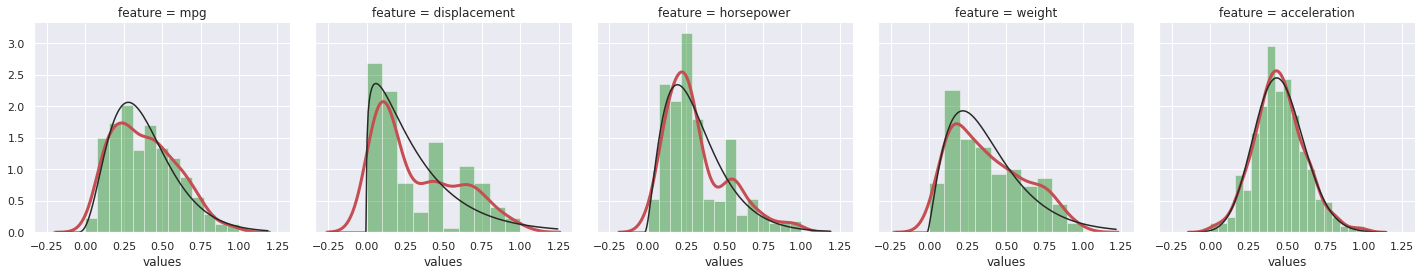

In [14]:
ds.dist_plots(data, features.get('numfeatures'), scale=True)

* A Quick way to find out highly correlated pairs in data,  t controls the boundry correlation threshold to filter the features
<br> and generates a sns themed plot 

weight and displacement = 0.93282
horsepower and displacement = 0.89726
weight and horsepower = 0.86454
weight and mpg = -0.83174
displacement and mpg = -0.80420


[[0.9328241468416345, 3, 1],
 [0.897257001843467, 2, 1],
 [0.8645377375741428, 3, 2],
 [-0.8317409332443352, 3, 0],
 [-0.8042028248058989, 1, 0]]

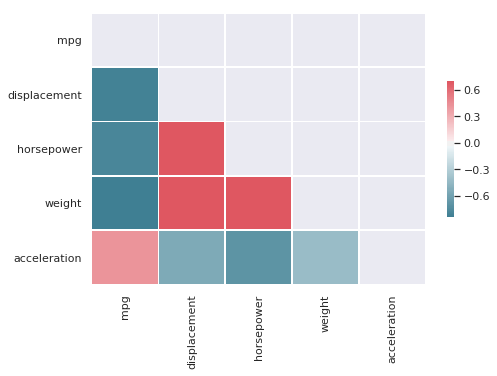

In [15]:
ds.check_correlations(data, features.get("numfeatures"), t=0.8, plot=True)